# Datasets statistics

This notebook contain the different plots to analyse the data produce in the different datasets.

## Imports and arguments

*   Add in the variable "tables" the different paths of the dataset you want to visualize.

In [74]:
from plot_methods import (
    datasets_stats,
    load_template,
    plot_events_length, 
    plot_unique_events,
    plot_time_diff, 
    plot_level_dist, 
    plot_embeddings,
    plot_execution_graph,
    plot_count_vectors,
)

In [75]:
path = "../results/db/"

tables = {
    "Normal v1": f"{path}/test_normal_v1.csv",
    "Abnormal v1": f"{path}/test_abnormal_v1.csv",
    "Normal v2": f"{path}/test_normal_v2.csv",
    "Abnormal v2": f"{path}/test_abnormal_v2.csv",
}

template_path = f"{path}/template.csv"

## General stats

### Different datasets

In [76]:
datasets_stats(tables)

,Name,Size
0,Normal v1,100
1,Abnormal v1,100
2,Normal v2,100
3,Abnormal v2,100


### Overall template

In [77]:
load_template(template_path)

,Template,Event ID
0,NaN,0
1,Machine<*>is ready.,1
2,Running...,2
3,Running in measurement mode.,3
4,Machine in measurement mode.,4
5,Machine<*>has been<*>.,5
6,<*>simulation,6
7,Machine in verification mode.,7
8,Loading...,8
9,Running in verification mode.,9


## Event Statistics

Statistics that are obtain by analyzing the different id event sequences.

### Sequence length

The length distribution of the different event sequences.

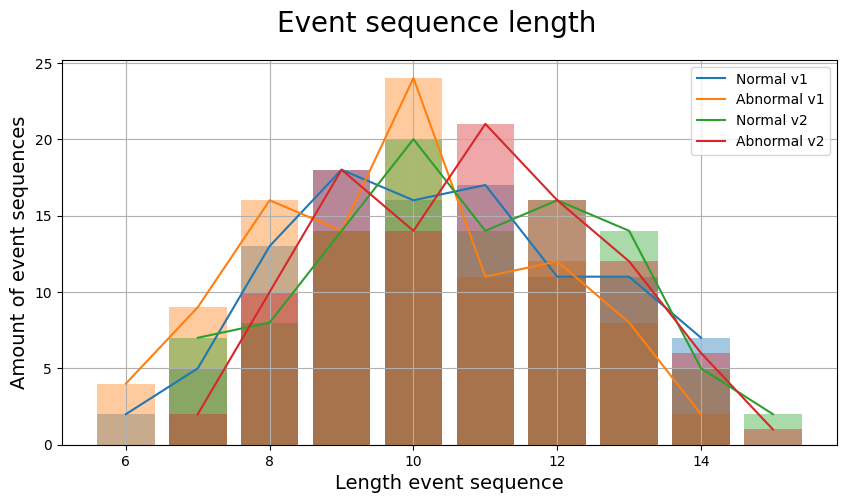

In [78]:
plot_events_length(tables)

### Evenet ID distribution

Event ID distribution of the different datasets

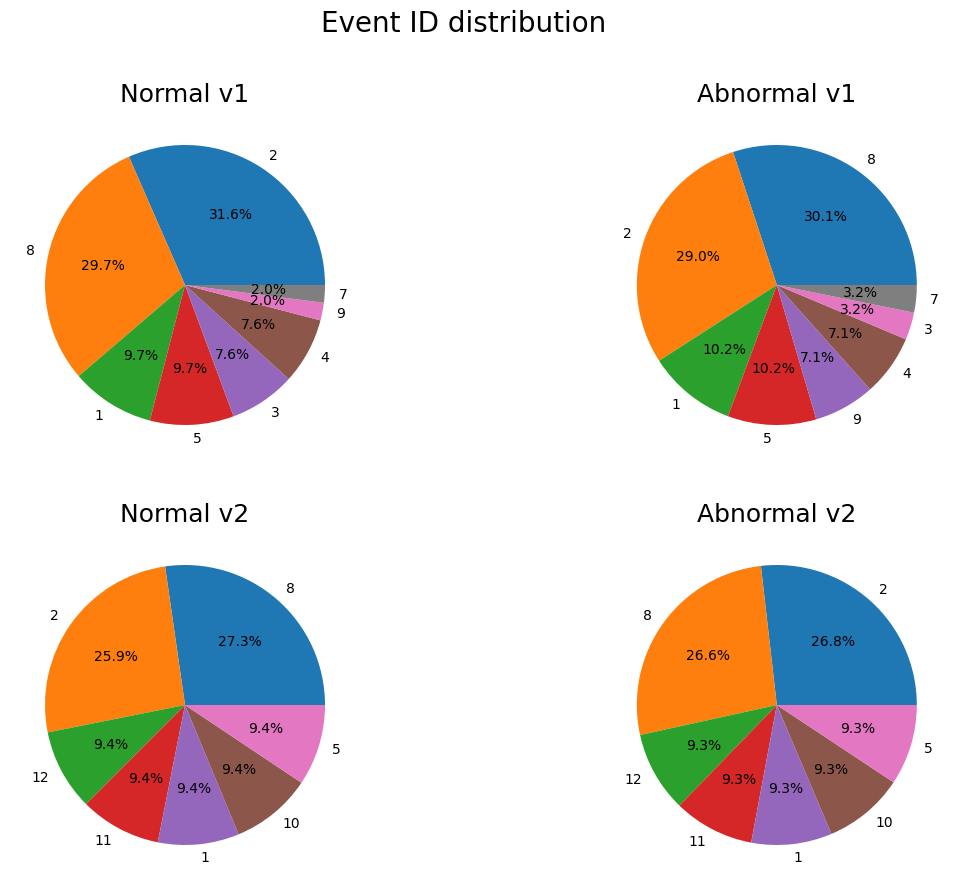

In [79]:
plot_unique_events(tables)

## Time Diff. Statistics

Time difference distribution between the first and the next event. In the plot we only show the first event.

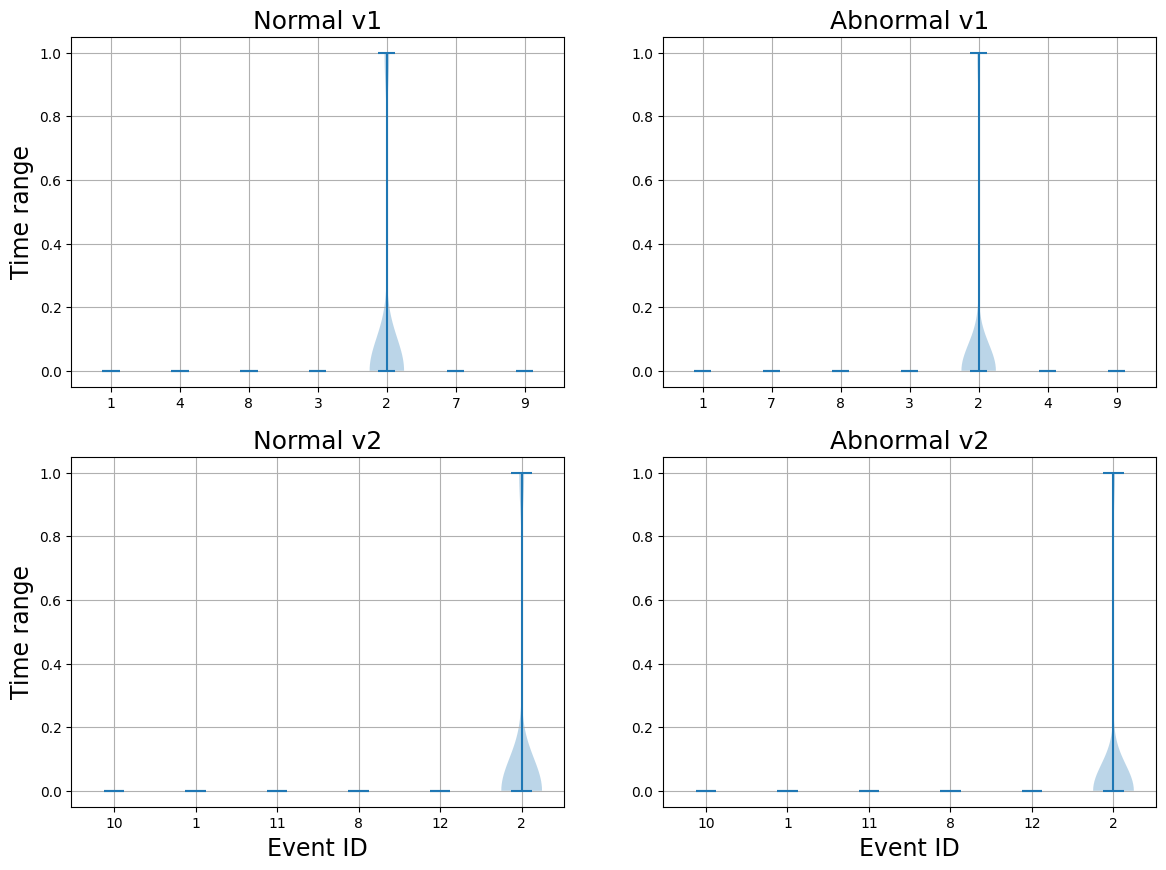

In [80]:
plot_time_diff(tables)

## Level log distribution

Pie plots of the log level distribution.

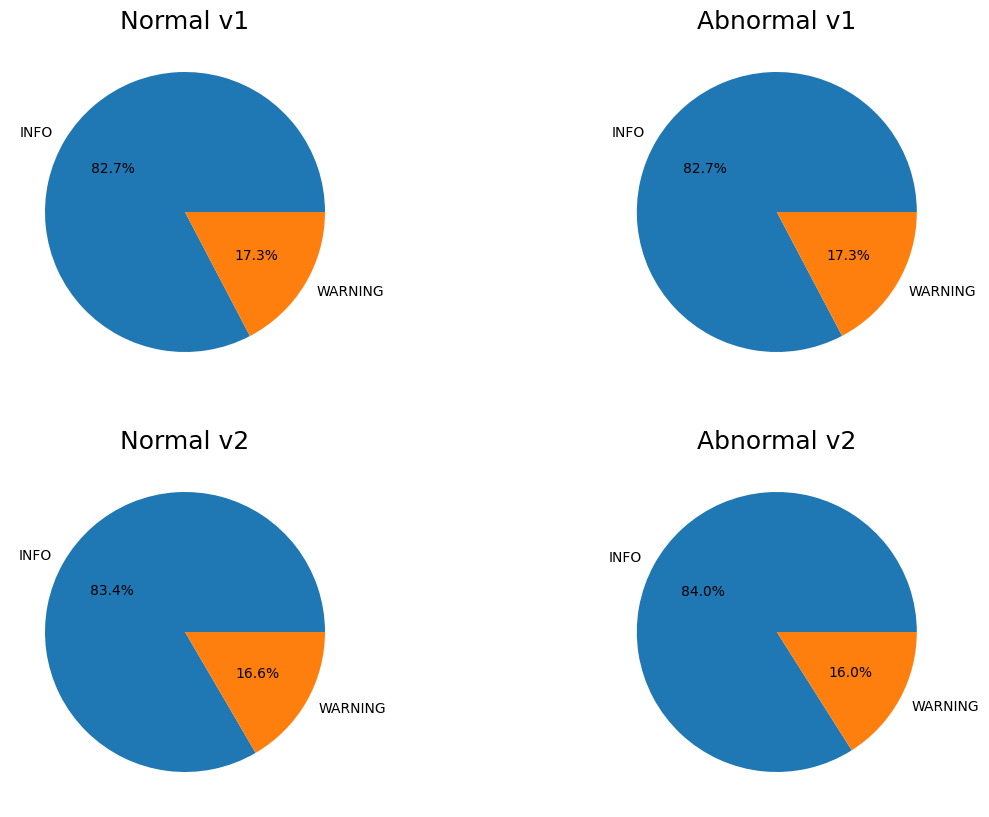

In [81]:
plot_level_dist(tables)

## NLP analysis

An LLM model is use to convert each sentence into a embedding space.

### Templates analysis

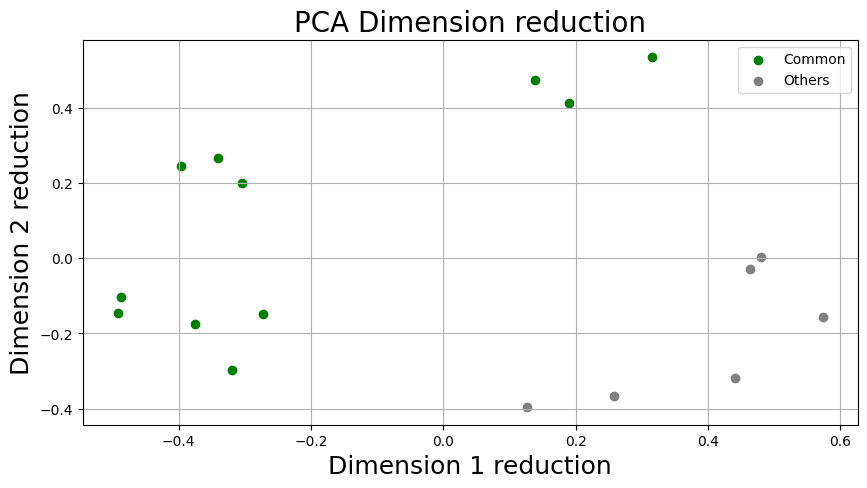

In [82]:
plot_embeddings(tables, "Template")

### Los message analysis

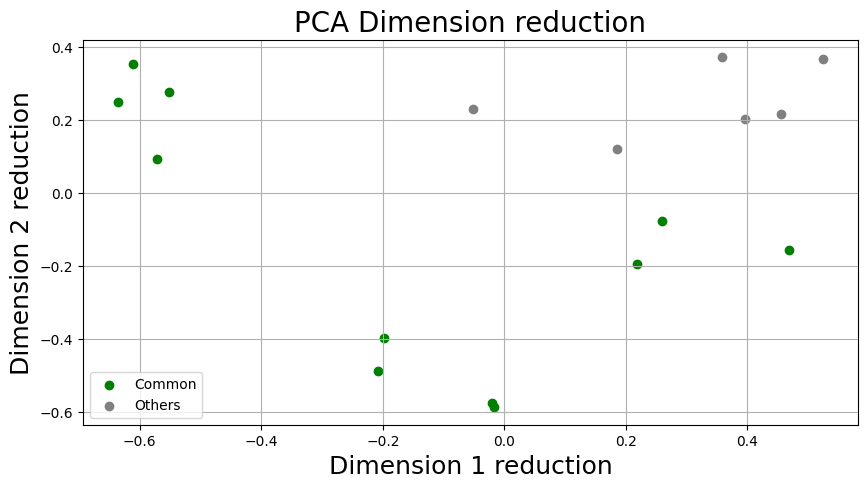

In [83]:
plot_embeddings(tables, "Content")

## Execution graph

Execution graphs of the code presented in graphs.

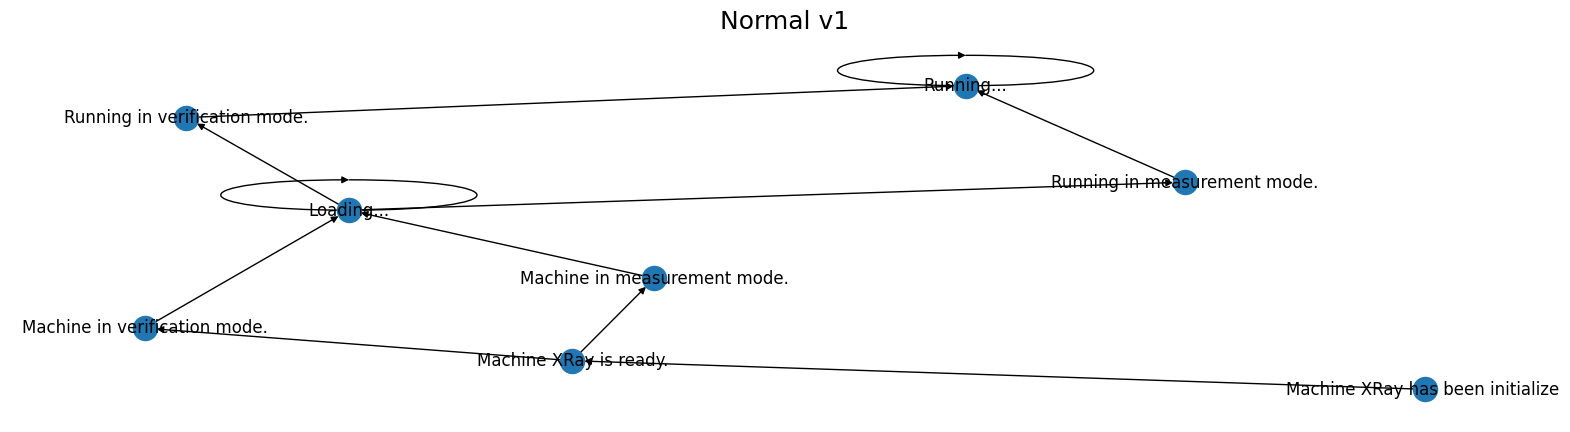

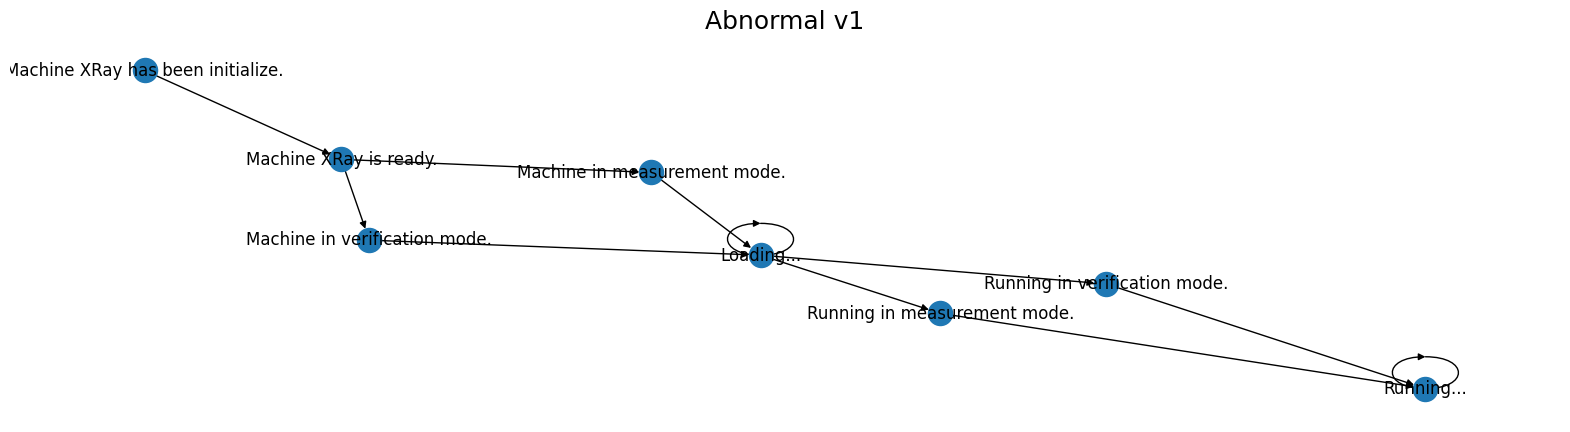

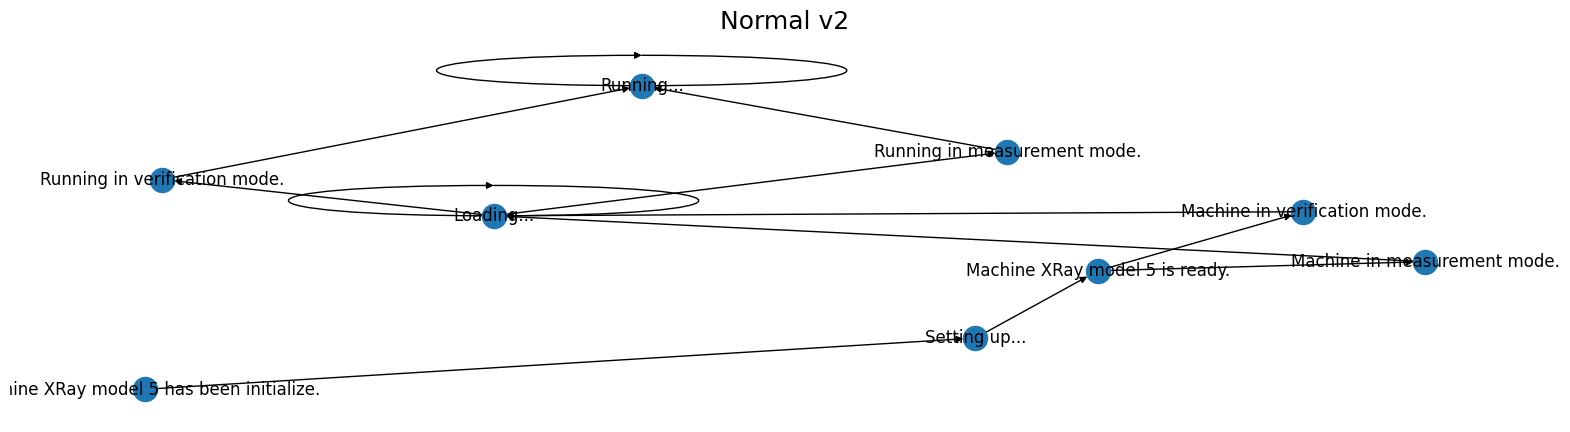

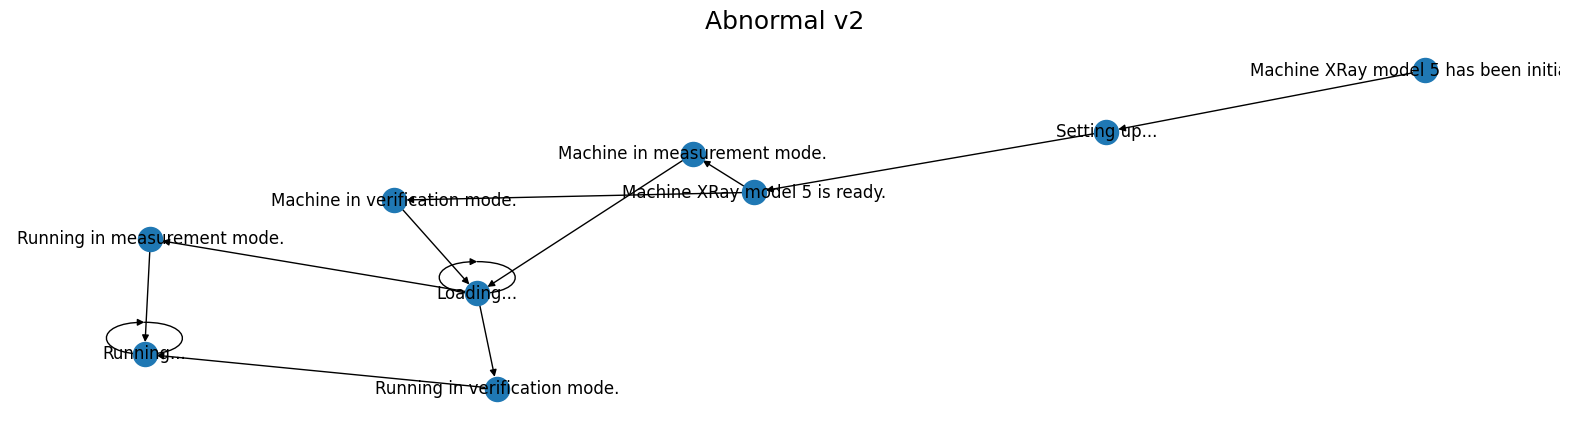

In [84]:
plot_execution_graph(tables)

## Vector count plot

Plot the vectors counts of each event in a sequence to spot correlations between events.

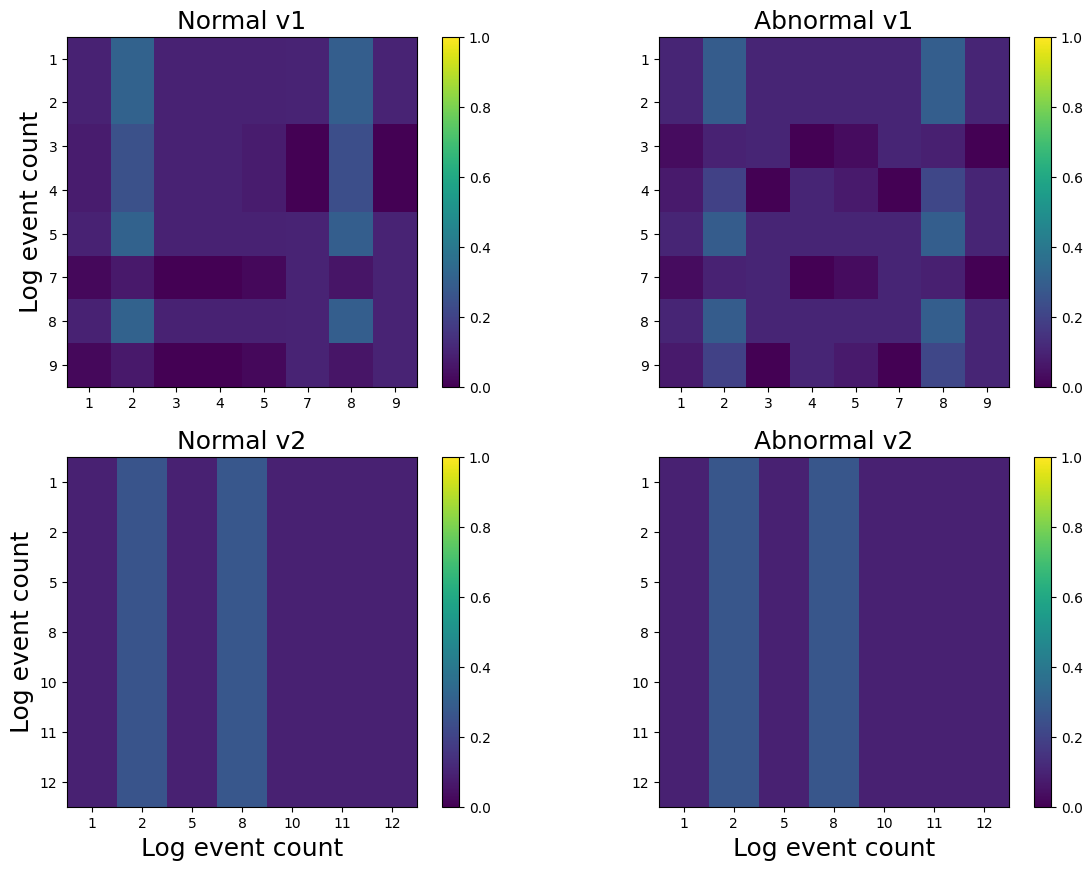

In [85]:
plot_count_vectors(tables)